  # Assignment 7

 $$\textbf  {Estudiante: Jesús David Cárdenas Barreto}\\
  \textbf {Simulación}\\
  \textbf {Grupo 51}$$

 – $\textbf {Markov Chain Monte Carlo}$

 Write a simple MCMC routine to produce N draws $\{x_i\}$ from the scaled/shifted Student-t distribution
 
$$T(x|ν,σ,μ)= \dfrac{Γ \bigg(\frac{ν+1}{2}\bigg)}{Γ \bigg(\frac{ν}{2}\bigg) \sqrt{ν\pi}σ}\bigg(1+\dfrac{1}{ν}\bigg(\dfrac{x-μ}{σ}\bigg)^{2}\bigg)^{\frac{-ν+1}{2}}$$

where the parameters ν, σ, μ are fixed here, and they define the properties of the distribution. As a concrete example, set them to ν = 3, σ = 1, μ = 1.5. For the proposal distribution you could use normal random variable with standard distribution α.
 
 
$*$ Run your code trying four different jump size scalings, α = 0.01, α = 0.1, α = 1 and α = 10. Visually inspect the chains. Which one appears to be exploring the distribution most effectively?
 
$*$ Using the same previous 4 sets of jumps sizes, run your code for N = 1000 iterations and use the output to produce histograms of the {xi }. Plot them against the target distribution T $(x|ν, σ, μ)$. Which distribution looks the best? 

$*$ Have your code compute the acceptance fraction for the proposed jumps (i.e., the fraction of the proposed jumps that are accepted). Does a high acceptance rate necessarily mean efficient exploration of the distribution?



# - First point

In [1]:
from scipy import random
from scipy import stats
from scipy.special import gamma as gam
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
def T(x,v,std,mu):
    return ((gam((v+1)/2))/(gam(v/2)*np.sqrt(v*np.pi)*std)*(1+(1/v)*((x-mu)/std)**2)**(-(v+1)/2))

In [3]:
v = 3
std = 1
mu = 1.5

In [4]:
n=1000
x = np.zeros(n)
x[0]=0
acept = 0
ratio=np.zeros(n)
ratio[0]=0

In [5]:
def nuevoMetodo(alpha,n,x):
    acept = 0
    for i in range(0, n-1):
        y=x[i]+np.random.uniform(-alpha,alpha)
        u = random.rand()
        if u < min(1,T(y,v,std,mu)/T(x[i],v,std,mu)):
            x[i+1]=y
            acept+=1
        else:
            x[i+1]=x[i]
    return acept        

In [6]:
def funcionRatio(ratio,x,n,alpha):
    for i in range(0, n-1):
        y=x[i]+np.random.uniform(-alpha,alpha)
        u = random.rand()
        if u < min(1,T(y,v,std,mu)/T(x[i],v,std,mu)):
            x[i+1]=y
            ratio[i]=y
        else:
            x[i+1]=x[i]
            ratio[i]=x[i]
    return ratio

In [25]:
alpha=0.01
print('Para alpha igual a ', alpha, ' la aceptación fue del:', nuevoMetodo(alpha,n,x)/n*100,'%')
alpha=0.1
print('Para alpha igual a ', alpha, ' la aceptación fue del:', nuevoMetodo(alpha,n,x)/n*100,'%')
alpha=1
print('Para alpha igual a ', alpha, ' la aceptación fue del:', nuevoMetodo(alpha,n,x)/n*100,'%')
alpha=10
print('Para alpha igual a ', alpha, ' la aceptación fue del:', nuevoMetodo(alpha,n,x)/n*100,'%')

Para alpha igual a  0.01  la aceptación fue del: 99.4 %
Para alpha igual a  0.1  la aceptación fue del: 98.5 %
Para alpha igual a  1  la aceptación fue del: 82.19999999999999 %
Para alpha igual a  10  la aceptación fue del: 23.200000000000003 %


# -Second point

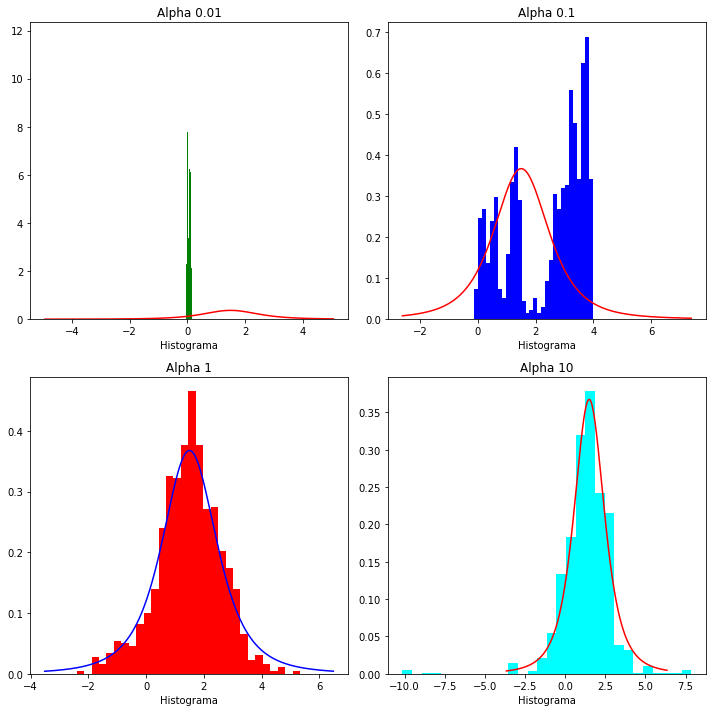

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

 



axes[0, 0].set_title("Alpha 0.01")
percent=nuevoMetodo(0.01,n,x)/n*100
media=np.mean(x)
axes[0, 0].hist(x,density = True, bins=30, color='green')
xs = np.linspace(media-5, media+5, n)
axes[0, 0].plot(xs, T(xs,v,std,mu), color='red')
axes[0, 0].set_xlabel("Histograma")


axes[0, 1].set_title("Alpha 0.1")
percent=nuevoMetodo(0.1,n,x)/n*100
media=np.mean(x)
axes[0, 1].hist(x,density = True, bins=30, color='blue')
xs = np.linspace(media-5, media+5, n)
axes[0, 1].plot(xs, T(xs,v,std,mu), color='red')
axes[0, 1].set_xlabel("Histograma")

axes[1, 0].set_title("Alpha 1")
percent=nuevoMetodo(1,n,x)/n*100
media=np.mean(x)
axes[1, 0].hist(x,density = True, bins=30, color='red')
xs = np.linspace(media-5, media+5, n)
axes[1, 0].plot(xs, T(xs,v,std,mu), color='blue')
axes[1, 0].set_xlabel("Histograma")

axes[1, 1].set_title("Alpha 10")
percent=nuevoMetodo(10,n,x)/n*100
media=np.mean(x)
axes[1, 1].hist(x,density = True, bins=30, color='cyan')
xs = np.linspace(media-5, media+5, n)
axes[1, 1].plot(xs, T(xs,v,std,mu), color='red')
axes[1, 1].set_xlabel("Histograma")


#axes[0, 1].remove()  # don't display empty ax

 

fig.tight_layout()
plt.show()

# -Thrid point

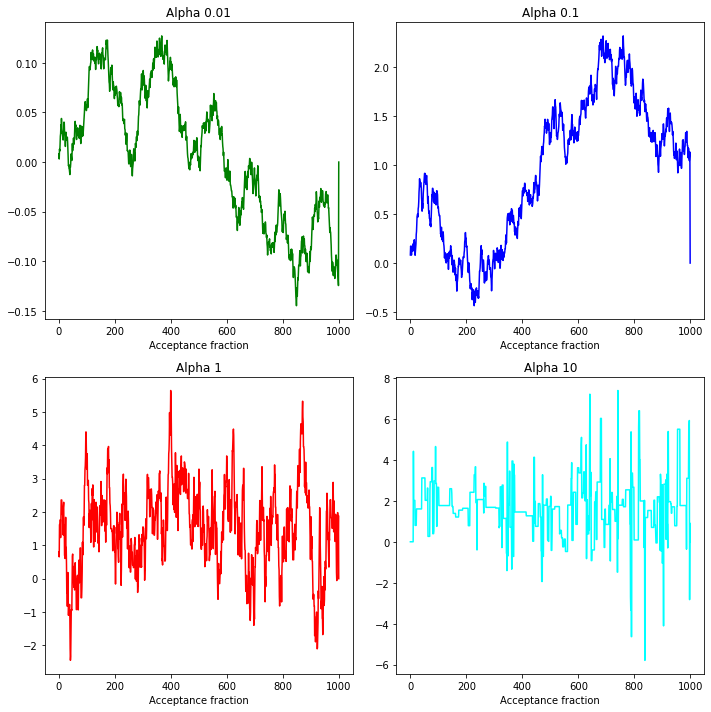

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

 


axes[0, 0].set_title("Alpha 0.01")
axes[0, 0].plot(funcionRatio(ratio,x,n,0.01), color="green")
axes[0, 0].set_xlabel("Acceptance fraction")


axes[0, 1].set_title("Alpha 0.1")
axes[0, 1].plot(funcionRatio(ratio,x,n,0.1), color="blue")
axes[0, 1].set_xlabel("Acceptance fraction")

axes[1, 0].set_title("Alpha 1")
axes[1, 0].plot(funcionRatio(ratio,x,n,1), color="red")
axes[1, 0].set_xlabel("Acceptance fraction")

axes[1, 1].set_title("Alpha 10")
axes[1, 1].plot(funcionRatio(ratio,x,n,10), color="cyan")
axes[1, 1].set_xlabel("Acceptance fraction")


#axes[0, 1].remove()  # don't display empty ax

 

fig.tight_layout()
plt.show()